# Working on text data
1. Read the dataset using pandas
2. Clean the data - remove punctuations, peove stop words, stemming and lemmetizing
3. Vectorize the data to prepare it for building the model
4. Feature Engineering (if required)
5. Applying Machine Learning algorithms

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# to display more of the text content
pd.set_option('display.max_colwidth', 100)

In [2]:
#read data 
path = '../practice/'
filename = 'reviewsAll_Apple.csv'

df = pd.read_csv(path+filename)

In [3]:
df.head()

,reviewerID,asin,Make,title,reviewerName,helpful,reviewText,overall,summary,reviewDate
0,A3SO1OKCBUUNOR,B0006HU4DK,Apple,"Apple MacBook Air MB003LL/A 13.3 Inch Laptop (1.6 GHz Intel Core 2 Duo Processor, 2 GB RAM, 80 G...",A. ALFALIH,"[15,18]","I have had this little miracle for a couple of weeks and I absolutely love it, in fact I take it...",5,Fantastic little laptop!!!,03/03/2008
1,A2YVYQ4CK97HUW,B0006HU4DK,Apple,"Apple MacBook Air MB003LL/A 13.3 Inch Laptop (1.6 GHz Intel Core 2 Duo Processor, 2 GB RAM, 80 G...","A.H. ""lovetotweet""","[5,5]",I cannot begin to describe how much I love this laptop! I won't provide a technical review as I...,5,Completely Amazing!,06/18/2008
2,A9HVYH0WIP8XI,B0006HU4DK,Apple,"Apple MacBook Air MB003LL/A 13.3 Inch Laptop (1.6 GHz Intel Core 2 Duo Processor, 2 GB RAM, 80 G...","Alan W. Demonbreun ""Road Dog""","[3,3]",I have been very pleased with my Mac book Air. It has worked perfect since I first turned it on....,4,Great Laptop,07/17/2008
3,A1ZWIOWUI8USN9,B0006HU4DK,Apple,"Apple MacBook Air MB003LL/A 13.3 Inch Laptop (1.6 GHz Intel Core 2 Duo Processor, 2 GB RAM, 80 G...","BC Nomad ""BC""","[12,37]","Good for checking emails, and very light word/excel processing work. Otherwise it is really more...",1,Do not waste your time and money,07/12/2008
4,A1OFGHUVBID9NW,B0006HU4DK,Apple,"Apple MacBook Air MB003LL/A 13.3 Inch Laptop (1.6 GHz Intel Core 2 Duo Processor, 2 GB RAM, 80 G...",Axel Grothey,"[166,169]",I just came back from a 3-day trip - my first travel experience with the MacBook Air. I do own a...,5,I own a MacBook Air... (update),02/16/2008


In [4]:
#Shape of Data
print(df.shape)
print("This dataset has {} rows and {} columns.".format(len(df), len(df.columns)))

(176, 10)
This dataset has 176 rows and 10 columns.


In [5]:
#Drop all neutral ratings i.e. drop rows where overall = 3
df = df.drop(df[df.overall==3].index)

In [6]:
#Using lambda to create a new column - "rating" derived from overall column
df["rating"] = df["overall"].apply(lambda x: 'H' if x>=4 else 'L')

In [7]:
df1 = df[["rating", "reviewText"]]

In [8]:
df1.head()

,rating,reviewText
0,H,"I have had this little miracle for a couple of weeks and I absolutely love it, in fact I take it..."
1,H,I cannot begin to describe how much I love this laptop! I won't provide a technical review as I...
2,H,I have been very pleased with my Mac book Air. It has worked perfect since I first turned it on....
3,L,"Good for checking emails, and very light word/excel processing work. Otherwise it is really more..."
4,H,I just came back from a 3-day trip - my first travel experience with the MacBook Air. I do own a...


In [9]:
#Check the total number of High-rated and Low-rated reviews
print("Out of total {} reviews, {} are high-rated reviews and {} are low-rated reviews.".format(len(df1),
                                                                                               len(df1[df1["rating"] == 'H']),
                                                                                                len(df1[df1["rating"] == 'L'])))

Out of total 165 reviews, 146 are high-rated reviews and 19 are low-rated reviews.


In [10]:
#to check number of missing rows
print("Number of missing rows in text column are {}.".format(df1["reviewText"].isnull().sum()))
print("Number of missing rows in text column are {}.".format(df1["rating"].isnull().sum()))

Number of missing rows in text column are 0.
Number of missing rows in text column are 0.


# Removing Punctuations

In [11]:
import re

#String package has all the necessary punctuations 
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [12]:
def remove_punct(reviewText):
    noPunct = [char for char in reviewText if char not in string.punctuation]
    return noPunct
#This function will return LIST of individual characters

In [13]:
#Apply the above defined function to all the rows of revieText
df1["noPunctuationText"] = df1["reviewText"].apply(lambda x: remove_punct(x))

C:\Users\Meetu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
df1.head()

,rating,reviewText,noPunctuationText
0,H,"I have had this little miracle for a couple of weeks and I absolutely love it, in fact I take it...","[I, , h, a, v, e, , h, a, d, , t, h, i, s, , l, i, t, t, l, e, , m, i, r, a, c, l, e, , f,..."
1,H,I cannot begin to describe how much I love this laptop! I won't provide a technical review as I...,"[I, , c, a, n, n, o, t, , b, e, g, i, n, , t, o, , d, e, s, c, r, i, b, e, , h, o, w, , m,..."
2,H,I have been very pleased with my Mac book Air. It has worked perfect since I first turned it on....,"[I, , h, a, v, e, , b, e, e, n, , v, e, r, y, , p, l, e, a, s, e, d, , w, i, t, h, , m, y,..."
3,L,"Good for checking emails, and very light word/excel processing work. Otherwise it is really more...","[G, o, o, d, , f, o, r, , c, h, e, c, k, i, n, g, , e, m, a, i, l, s, , a, n, d, , v, e, r,..."
4,H,I just came back from a 3-day trip - my first travel experience with the MacBook Air. I do own a...,"[I, , j, u, s, t, , c, a, m, e, , b, a, c, k, , f, r, o, m, , a, , 3, d, a, y, , t, r, i,..."


In [15]:
# to combine all characters back to words, we will use JOIN
def remove_punct(reviewText):
    noPunct = "".join([char for char in reviewText if char not in string.punctuation])
    return noPunct
#This function will return words

df1["noPunctuationText"] = df1["reviewText"].apply(lambda x: remove_punct(x))
df1.head()

C:\Users\Meetu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,rating,reviewText,noPunctuationText
0,H,"I have had this little miracle for a couple of weeks and I absolutely love it, in fact I take it...",I have had this little miracle for a couple of weeks and I absolutely love it in fact I take it ...
1,H,I cannot begin to describe how much I love this laptop! I won't provide a technical review as I...,I cannot begin to describe how much I love this laptop I wont provide a technical review as I a...
2,H,I have been very pleased with my Mac book Air. It has worked perfect since I first turned it on....,I have been very pleased with my Mac book Air It has worked perfect since I first turned it on M...
3,L,"Good for checking emails, and very light word/excel processing work. Otherwise it is really more...",Good for checking emails and very light wordexcel processing work Otherwise it is really more a ...
4,H,I just came back from a 3-day trip - my first travel experience with the MacBook Air. I do own a...,I just came back from a 3day trip my first travel experience with the MacBook Air I do own a fi...


# Tokenization

In [16]:
# backslash W+ \W+ will split on any non-word character, which means it will split on any whitespace/splecial characters etc
import re
def tokenize(reviewText):
    tokens = re.split('\W+', reviewText)
    return tokens

df1["cleanText"] = df1["noPunctuationText"].apply(lambda x: tokenize(x.lower()))

C:\Users\Meetu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [17]:
df1.head()

,rating,reviewText,noPunctuationText,cleanText
0,H,"I have had this little miracle for a couple of weeks and I absolutely love it, in fact I take it...",I have had this little miracle for a couple of weeks and I absolutely love it in fact I take it ...,"[i, have, had, this, little, miracle, for, a, couple, of, weeks, and, i, absolutely, love, it, i..."
1,H,I cannot begin to describe how much I love this laptop! I won't provide a technical review as I...,I cannot begin to describe how much I love this laptop I wont provide a technical review as I a...,"[i, cannot, begin, to, describe, how, much, i, love, this, laptop, i, wont, provide, a, technica..."
2,H,I have been very pleased with my Mac book Air. It has worked perfect since I first turned it on....,I have been very pleased with my Mac book Air It has worked perfect since I first turned it on M...,"[i, have, been, very, pleased, with, my, mac, book, air, it, has, worked, perfect, since, i, fir..."
3,L,"Good for checking emails, and very light word/excel processing work. Otherwise it is really more...",Good for checking emails and very light wordexcel processing work Otherwise it is really more a ...,"[good, for, checking, emails, and, very, light, wordexcel, processing, work, otherwise, it, is, ..."
4,H,I just came back from a 3-day trip - my first travel experience with the MacBook Air. I do own a...,I just came back from a 3day trip my first travel experience with the MacBook Air I do own a fi...,"[i, just, came, back, from, a, 3day, trip, my, first, travel, experience, with, the, macbook, ai..."


# Remove Stopwords

In [18]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')

In [19]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return(text)

df1["noStopwords"] = df1["cleanText"].apply(lambda x: remove_stopwords(x))

C:\Users\Meetu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [20]:
df1.head()

,rating,reviewText,noPunctuationText,cleanText,noStopwords
0,H,"I have had this little miracle for a couple of weeks and I absolutely love it, in fact I take it...",I have had this little miracle for a couple of weeks and I absolutely love it in fact I take it ...,"[i, have, had, this, little, miracle, for, a, couple, of, weeks, and, i, absolutely, love, it, i...","[little, miracle, couple, weeks, absolutely, love, fact, take, anywhere, go, alot, fo, people, n..."
1,H,I cannot begin to describe how much I love this laptop! I won't provide a technical review as I...,I cannot begin to describe how much I love this laptop I wont provide a technical review as I a...,"[i, cannot, begin, to, describe, how, much, i, love, this, laptop, i, wont, provide, a, technica...","[cannot, begin, describe, much, love, laptop, wont, provide, technical, review, sure, reviewers,..."
2,H,I have been very pleased with my Mac book Air. It has worked perfect since I first turned it on....,I have been very pleased with my Mac book Air It has worked perfect since I first turned it on M...,"[i, have, been, very, pleased, with, my, mac, book, air, it, has, worked, perfect, since, i, fir...","[pleased, mac, book, air, worked, perfect, since, first, turned, migrated, old, mac, book, witho..."
3,L,"Good for checking emails, and very light word/excel processing work. Otherwise it is really more...",Good for checking emails and very light wordexcel processing work Otherwise it is really more a ...,"[good, for, checking, emails, and, very, light, wordexcel, processing, work, otherwise, it, is, ...","[good, checking, emails, light, wordexcel, processing, work, otherwise, really, gadget, real, co..."
4,H,I just came back from a 3-day trip - my first travel experience with the MacBook Air. I do own a...,I just came back from a 3day trip my first travel experience with the MacBook Air I do own a fi...,"[i, just, came, back, from, a, 3day, trip, my, first, travel, experience, with, the, macbook, ai...","[came, back, 3day, trip, first, travel, experience, macbook, air, first, generation, macbook, pr..."


# Stemming:
Stemming is used to reduce dimensionality for corpus and correlated words

In [21]:
ps = nltk.PorterStemmer()
#this will display all methods available in ps, most common is stem method
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [122]:
print(ps.stem('runs'))
print(ps.stem("running"))
print(ps.stem("runner"))

run
run
runner


In [123]:
t = ['test','in','the','last']
r = [word for word in t if word not in ['in', 'the']]
print(r)

['test', 'last']


In [124]:
len(df1)

165

In [23]:
#Stemming is not always a good technique
# for example, it will convert all below words to mean, although the meaning is different
print(ps.stem('meanness'))
print(ps.stem("meaning"))
print(ps.stem("means"))

mean
mean
mean


In [24]:
# Now we will work on "noStopwords" column and apply stem function on each row
def stemming(noStopwords):
    text = [ps.stem(word) for word in noStopwords]
    return text

df1["stemmed"] = df1["noStopwords"].apply(lambda x: stemming(x))
df1.head()

C:\Users\Meetu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,rating,reviewText,noPunctuationText,cleanText,noStopwords,stemmed
0,H,"I have had this little miracle for a couple of weeks and I absolutely love it, in fact I take it...",I have had this little miracle for a couple of weeks and I absolutely love it in fact I take it ...,"[i, have, had, this, little, miracle, for, a, couple, of, weeks, and, i, absolutely, love, it, i...","[little, miracle, couple, weeks, absolutely, love, fact, take, anywhere, go, alot, fo, people, n...","[littl, miracl, coupl, week, absolut, love, fact, take, anywher, go, alot, fo, peopl, neg, produ..."
1,H,I cannot begin to describe how much I love this laptop! I won't provide a technical review as I...,I cannot begin to describe how much I love this laptop I wont provide a technical review as I a...,"[i, cannot, begin, to, describe, how, much, i, love, this, laptop, i, wont, provide, a, technica...","[cannot, begin, describe, much, love, laptop, wont, provide, technical, review, sure, reviewers,...","[cannot, begin, describ, much, love, laptop, wont, provid, technic, review, sure, review, much, ..."
2,H,I have been very pleased with my Mac book Air. It has worked perfect since I first turned it on....,I have been very pleased with my Mac book Air It has worked perfect since I first turned it on M...,"[i, have, been, very, pleased, with, my, mac, book, air, it, has, worked, perfect, since, i, fir...","[pleased, mac, book, air, worked, perfect, since, first, turned, migrated, old, mac, book, witho...","[pleas, mac, book, air, work, perfect, sinc, first, turn, migrat, old, mac, book, without, hitch..."
3,L,"Good for checking emails, and very light word/excel processing work. Otherwise it is really more...",Good for checking emails and very light wordexcel processing work Otherwise it is really more a ...,"[good, for, checking, emails, and, very, light, wordexcel, processing, work, otherwise, it, is, ...","[good, checking, emails, light, wordexcel, processing, work, otherwise, really, gadget, real, co...","[good, check, email, light, wordexcel, process, work, otherwis, realli, gadget, real, comput, ha..."
4,H,I just came back from a 3-day trip - my first travel experience with the MacBook Air. I do own a...,I just came back from a 3day trip my first travel experience with the MacBook Air I do own a fi...,"[i, just, came, back, from, a, 3day, trip, my, first, travel, experience, with, the, macbook, ai...","[came, back, 3day, trip, first, travel, experience, macbook, air, first, generation, macbook, pr...","[came, back, 3day, trip, first, travel, experi, macbook, air, first, gener, macbook, pro, honest..."


# Lemmatizing: 
Using Vocabulary Analysis of words to remove inflectional endings and return the dictionary form of the word

# Stemming versus Lemmatizing
Both reduce the corpus size and convert correlated words to the base word
Stemming is fast and is based on heuristic approach that stems the word without considering its context
where as Lemmatizing uses more informed analysis, returning dictionary word but its computationaly expensive

In [25]:
#We will use word net lemmatizer, which has commonly used lemmatize method
wn = nltk.WordNetLemmatizer()
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 'lemmatize',
 'unicode_repr']

In [26]:
print(ps.stem('meanness'))
print(ps.stem("meaning"))
print(ps.stem("means"))

mean
mean
mean


In [27]:
#import nltk
#nltk.download('wordnet')
print(wn.lemmatize('meanness'))
print(wn.lemmatize("meaning"))
print(wn.lemmatize("means"))

meanness
meaning
mean


In [28]:
print(ps.stem('mouse'))
print(ps.stem("mice"))

print(wn.lemmatize('mouse'))
print(wn.lemmatize("mice"))

mous
mice
mouse
mouse


In [29]:
def lem(noStopwords):
    text = [wn.lemmatize(word) for word in noStopwords]
    return text

df1["lemmatized"] = df1["noStopwords"].apply(lambda x: lem(x))
df1.head()

C:\Users\Meetu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,rating,reviewText,noPunctuationText,cleanText,noStopwords,stemmed,lemmatized
0,H,"I have had this little miracle for a couple of weeks and I absolutely love it, in fact I take it...",I have had this little miracle for a couple of weeks and I absolutely love it in fact I take it ...,"[i, have, had, this, little, miracle, for, a, couple, of, weeks, and, i, absolutely, love, it, i...","[little, miracle, couple, weeks, absolutely, love, fact, take, anywhere, go, alot, fo, people, n...","[littl, miracl, coupl, week, absolut, love, fact, take, anywher, go, alot, fo, peopl, neg, produ...","[little, miracle, couple, week, absolutely, love, fact, take, anywhere, go, alot, fo, people, ne..."
1,H,I cannot begin to describe how much I love this laptop! I won't provide a technical review as I...,I cannot begin to describe how much I love this laptop I wont provide a technical review as I a...,"[i, cannot, begin, to, describe, how, much, i, love, this, laptop, i, wont, provide, a, technica...","[cannot, begin, describe, much, love, laptop, wont, provide, technical, review, sure, reviewers,...","[cannot, begin, describ, much, love, laptop, wont, provid, technic, review, sure, review, much, ...","[cannot, begin, describe, much, love, laptop, wont, provide, technical, review, sure, reviewer, ..."
2,H,I have been very pleased with my Mac book Air. It has worked perfect since I first turned it on....,I have been very pleased with my Mac book Air It has worked perfect since I first turned it on M...,"[i, have, been, very, pleased, with, my, mac, book, air, it, has, worked, perfect, since, i, fir...","[pleased, mac, book, air, worked, perfect, since, first, turned, migrated, old, mac, book, witho...","[pleas, mac, book, air, work, perfect, sinc, first, turn, migrat, old, mac, book, without, hitch...","[pleased, mac, book, air, worked, perfect, since, first, turned, migrated, old, mac, book, witho..."
3,L,"Good for checking emails, and very light word/excel processing work. Otherwise it is really more...",Good for checking emails and very light wordexcel processing work Otherwise it is really more a ...,"[good, for, checking, emails, and, very, light, wordexcel, processing, work, otherwise, it, is, ...","[good, checking, emails, light, wordexcel, processing, work, otherwise, really, gadget, real, co...","[good, check, email, light, wordexcel, process, work, otherwis, realli, gadget, real, comput, ha...","[good, checking, email, light, wordexcel, processing, work, otherwise, really, gadget, real, com..."
4,H,I just came back from a 3-day trip - my first travel experience with the MacBook Air. I do own a...,I just came back from a 3day trip my first travel experience with the MacBook Air I do own a fi...,"[i, just, came, back, from, a, 3day, trip, my, first, travel, experience, with, the, macbook, ai...","[came, back, 3day, trip, first, travel, experience, macbook, air, first, generation, macbook, pr...","[came, back, 3day, trip, first, travel, experi, macbook, air, first, gener, macbook, pro, honest...","[came, back, 3day, trip, first, travel, experience, macbook, air, first, generation, macbook, pr..."


# Count Vectorization

In [30]:
#combining all 3 steps in 1 function - removing punctuation, Splitting the text and Stemming
def clean_text(reviewText):
    text = "".join([word.lower() for word in reviewText if word not in string.punctuation ])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)

In [32]:
#using ONLY fit will help the vecorizer to know the words in the corpus, it will do nothing to the data
# therefore, use fit with TRANSFORM, then it will actually vectorize the data to turn them to feature vector
x_counts = count_vect.fit_transform(df1["reviewText"])
print(x_counts.shape)
# (165, 3245) This shows it has 165 texts and has 3245 unique words as columns - this is DTM with 165 rows and 3245 columns
print(count_vect.get_feature_names())
# this will print name of the columns  

(165, 3245)
['', '0', '02ghz', '06', '076', '08', '08accord', '08ilif', '1', '10', '100', '1000', '104', '10411', '105', '1052', '108', '1080p', '1087', '109', '10updat', '10x', '11', '111', '11iso', '11n', '12', '120', '1200', '120bi', '120gb', '121', '128', '1280x1050', '128gb', '128mb', '12ghz', '13', '1300i', '132', '133', '14', '1440x900', '1440x98o', '14inch', '15', '150', '1500', '1517', '1517vmware', '154', '15in', '160', '160gb', '167', '1680', '169', '16ghz', '17', '17in', '18', '183ghz', '1864', '18ghz', '18th', '19', '1920', '1920x1080', '1985', '1990', '1998', '199900', '1kwhat', '1mm', '1st', '1tb', '1vcpu', '2', '20', '200', '2000', '2006', '2007', '2008', '2009', '20102011', '20gb', '20mp', '21', '216', '2199', '22', '22g', '22ghz', '23', '233', '233ghz', '235989', '24', '2400', '249900', '24ghz', '25', '250', '2500', '2500ish', '256', '256m', '256mb', '25inch', '260gb', '26ghz', '29', '2929', '2gb', '2gbhdd', '2k', '2k3k', '2nd', '2wd', '2wire', '2wiresi', '2x2gb', '2y

In [33]:
#x_counts is in the form of a sparse matrix - a matrix in which most entries are 0. For efficient storage, 
#it is stored by only storing the location of non-zero elements
print(type(x_counts))
x_counts

<class 'scipy.sparse.csr.csr_matrix'>


<165x3245 sparse matrix of type '<class 'numpy.int64'>'
	with 12672 stored elements in Compressed Sparse Row format>

In [34]:
#To display the contents of this sparse matrix, we need to convert it to array and then to a dataframe
x_counts_df = pd.DataFrame(x_counts.toarray())
print(x_counts_df[100:120])

     0     1     2     3     4     5     6     7     8     9     ...   3235  \
100     0     0     0     0     0     0     0     0     0     0  ...      0   
101     0     0     0     0     0     0     0     0     0     0  ...      0   
102     0     0     0     0     0     0     0     0     0     0  ...      0   
103     0     0     0     0     0     0     0     0     0     0  ...      0   
104     0     0     0     0     0     0     0     0     0     0  ...      0   
105     0     0     0     0     0     0     0     0     0     1  ...      0   
106     0     0     0     0     0     0     0     0     0     0  ...      0   
107     0     0     0     0     0     0     0     0     0     0  ...      0   
108     0     0     0     0     0     0     0     0     0     0  ...      0   
109     0     0     0     0     0     0     0     0     1     0  ...      0   
110     0     0     0     0     0     0     0     0     0     0  ...      0   
111     0     0     0     0     0     0     0     0 

In [35]:
#Column names are in the form of numbers in DTM, so we use count_vect.get_feature_names() to fetch the underlying column names
x_counts_df.columns = count_vect.get_feature_names()
print(x_counts_df[100:120])

        0  02ghz  06  076  08  08accord  08ilif  1  10  ...   youi  youll  \
100  0  0      0   0    0   0         0       0  0   0  ...      0      0   
101  0  0      0   0    0   0         0       0  0   0  ...      0      0   
102  0  0      0   0    0   0         0       0  0   0  ...      0      0   
103  0  0      0   0    0   0         0       0  0   0  ...      0      0   
104  0  0      0   0    0   0         0       0  0   0  ...      0      0   
105  0  0      0   0    0   0         0       0  0   1  ...      0      0   
106  0  0      0   0    0   0         0       0  0   0  ...      0      0   
107  0  0      0   0    0   0         0       0  0   0  ...      0      0   
108  0  0      0   0    0   0         0       0  0   0  ...      0      0   
109  0  0      0   0    0   0         0       0  1   0  ...      0      0   
110  0  0      0   0    0   0         0       0  0   0  ...      0      0   
111  0  0      0   0    0   0         0       0  0   0  ...      0      0   

# N-gram Vectorizing

In [36]:
#combining all 3 steps in 1 function - removing punctuation, Splitting the text and Stemming
#instead of removing stopwords at last step, and getting tokens, this time we will return strings 
#or tokens combined with space in between them
def clean_text1(reviewText):
    text = "".join([word.lower() for word in reviewText if word not in string.punctuation ])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

In [37]:
df1["cleaned_text"] = df1["reviewText"].apply(lambda x: clean_text1(x))
df1.head()

C:\Users\Meetu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,rating,reviewText,noPunctuationText,cleanText,noStopwords,stemmed,lemmatized,cleaned_text
0,H,"I have had this little miracle for a couple of weeks and I absolutely love it, in fact I take it...",I have had this little miracle for a couple of weeks and I absolutely love it in fact I take it ...,"[i, have, had, this, little, miracle, for, a, couple, of, weeks, and, i, absolutely, love, it, i...","[little, miracle, couple, weeks, absolutely, love, fact, take, anywhere, go, alot, fo, people, n...","[littl, miracl, coupl, week, absolut, love, fact, take, anywher, go, alot, fo, peopl, neg, produ...","[little, miracle, couple, week, absolutely, love, fact, take, anywhere, go, alot, fo, people, ne...",littl miracl coupl week absolut love fact take anywher go alot fo peopl neg product lack dvd dri...
1,H,I cannot begin to describe how much I love this laptop! I won't provide a technical review as I...,I cannot begin to describe how much I love this laptop I wont provide a technical review as I a...,"[i, cannot, begin, to, describe, how, much, i, love, this, laptop, i, wont, provide, a, technica...","[cannot, begin, describe, much, love, laptop, wont, provide, technical, review, sure, reviewers,...","[cannot, begin, describ, much, love, laptop, wont, provid, technic, review, sure, review, much, ...","[cannot, begin, describe, much, love, laptop, wont, provide, technical, review, sure, reviewer, ...",cannot begin describ much love laptop wont provid technic review sure review much compet purchas...
2,H,I have been very pleased with my Mac book Air. It has worked perfect since I first turned it on....,I have been very pleased with my Mac book Air It has worked perfect since I first turned it on M...,"[i, have, been, very, pleased, with, my, mac, book, air, it, has, worked, perfect, since, i, fir...","[pleased, mac, book, air, worked, perfect, since, first, turned, migrated, old, mac, book, witho...","[pleas, mac, book, air, work, perfect, sinc, first, turn, migrat, old, mac, book, without, hitch...","[pleased, mac, book, air, worked, perfect, since, first, turned, migrated, old, mac, book, witho...",pleas mac book air work perfect sinc first turn migrat old mac book without hitch boot mac book ...
3,L,"Good for checking emails, and very light word/excel processing work. Otherwise it is really more...",Good for checking emails and very light wordexcel processing work Otherwise it is really more a ...,"[good, for, checking, emails, and, very, light, wordexcel, processing, work, otherwise, it, is, ...","[good, checking, emails, light, wordexcel, processing, work, otherwise, really, gadget, real, co...","[good, check, email, light, wordexcel, process, work, otherwis, realli, gadget, real, comput, ha...","[good, checking, email, light, wordexcel, processing, work, otherwise, really, gadget, real, com...",good check email light wordexcel process work otherwis realli gadget real comput hard drive smal...
4,H,I just came back from a 3-day trip - my first travel experience with the MacBook Air. I do own a...,I just came back from a 3day trip my first travel experience with the MacBook Air I do own a fi...,"[i, just, came, back, from, a, 3day, trip, my, first, travel, experience, with, the, macbook, ai...","[came, back, 3day, trip, first, travel, experience, macbook, air, first, generation, macbook, pr...","[came, back, 3day, trip, first, travel, experi, macbook, air, first, gener, macbook, pro, honest...","[came, back, 3day, trip, first, travel, experience, macbook, air, first, generation, macbook, pr...",came back 3day trip first travel experi macbook air first gener macbook pro honestli tempt first...


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
#unigrams
#count_vect = CountVectorizer(ngram_range=(1,1))
#Bigrams
ngram_vect = CountVectorizer(ngram_range=(2,2))
#unigrams, bigrams and trigrams
#count_vect = CountVectorizer(ngram_range=(1,3))
x_counts = ngram_vect.fit_transform(df1["cleaned_text"])
print(x_counts.shape)
print(ngram_vect.get_feature_names())

(165, 14487)
['02ghz worth', '06 among', '076 inch', '08 direct', '08 downgrad', '08 event', '08 made', '08 tradeoff', '08accord appl', '08ilif alway', '10 20', '10 educ', '10 gig', '10 restock', '10 vaio', '10 year', '100 perfect', '1000 laptop', '1000 lower', '104 instal', '104 tiger', '104 version', '10411 win', '105 appl', '105 dont', '105 leopard', '1052 came', '108 tb', '1080p lcd', '1080p video', '1087 im', '109 upgrad', '10updat price', '10x product', '10x successso', '11 12', '11 year', '111 121', '11iso far', '11n access', '12 altern', '12 g4', '12 hour', '12 lb', '12 powerbookg4', '12 quickli', '12 screen', '12 trade', '12 window', '120 160gb', '120 gb', '1200 astonish', '120bi thing', '120gb 5400rpm', '121 screen', '128 mb', '1280x1050 1440x900', '128gb solid', '128mb video', '12ghz processor', '13 inch', '13 inchit', '13 month', '13 screen', '13 year', '1300i love', '132 mba', '133 inch', '133 laptop', '133 make', '14 inspiron', '1440x900 day', '1440x900 first', '1440x900 

# tfidf Vectorizer
Tf-idf is a count Vectorizer that includes some considerations such as length of the document and 
how common the word is across all documents/other text messages

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
x_tfidf = tfidf_vect.fit_transform(df1["reviewText"])
print(x_tfidf.shape)
# (165, 3245) This shows it has 165 texts and has 3245 unique words as columns - this is DTM with 165 rows and 3245 columns
print(tfidf_vect.get_feature_names())
# this will print name of the columns  

(165, 3245)
['', '0', '02ghz', '06', '076', '08', '08accord', '08ilif', '1', '10', '100', '1000', '104', '10411', '105', '1052', '108', '1080p', '1087', '109', '10updat', '10x', '11', '111', '11iso', '11n', '12', '120', '1200', '120bi', '120gb', '121', '128', '1280x1050', '128gb', '128mb', '12ghz', '13', '1300i', '132', '133', '14', '1440x900', '1440x98o', '14inch', '15', '150', '1500', '1517', '1517vmware', '154', '15in', '160', '160gb', '167', '1680', '169', '16ghz', '17', '17in', '18', '183ghz', '1864', '18ghz', '18th', '19', '1920', '1920x1080', '1985', '1990', '1998', '199900', '1kwhat', '1mm', '1st', '1tb', '1vcpu', '2', '20', '200', '2000', '2006', '2007', '2008', '2009', '20102011', '20gb', '20mp', '21', '216', '2199', '22', '22g', '22ghz', '23', '233', '233ghz', '235989', '24', '2400', '249900', '24ghz', '25', '250', '2500', '2500ish', '256', '256m', '256mb', '25inch', '260gb', '26ghz', '29', '2929', '2gb', '2gbhdd', '2k', '2k3k', '2nd', '2wd', '2wire', '2wiresi', '2x2gb', '2y

In [75]:
df1_sample = df1[0:20]
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect_sample = TfidfVectorizer(analyzer=clean_text)
x_tfidf_sample = tfidf_vect_sample.fit_transform(df1_sample["reviewText"])
print(x_tfidf_sample.shape)
# (20, 1046) This shows it has 20 texts and has 1046 unique words as columns - this is DTM with 20 rows and 1046 columns
print(tfidf_vect_sample.get_feature_names())
# this will print name of the columns  

(20, 1046)
['', '076', '1', '10', '100', '105', '1080p', '11', '12', '13', '15', '18', '1kwhat', '2', '2008', '2009', '23', '25', '29', '2gb', '2year', '3', '300', '34', '3day', '3g', '4', '4mb', '4port', '5', '6', '64', '68', '720', '8', '80', '80gb', '99', 'abl', 'abound', 'absolut', 'access', 'accessori', 'accomplish', 'action', 'activ', 'actual', 'ad', 'adapt', 'adapterat', 'add', 'addict', 'adequatea', 'advertis', 'afford', 'afraid', 'africa', 'ago', 'air', 'air10', 'airport', 'alarmingli', 'allow', 'almost', 'alon', 'along', 'alot', 'alreadi', 'also', 'alsoth', 'altern', 'although', 'alway', 'amaz', 'amazingli', 'amazonthi', 'amount', 'announc', 'announcementmi', 'annoyingli', 'anoth', 'antenna', 'anticip', 'antiviru', 'anyon', 'anyth', 'anytim', 'anyway', 'anywher', 'app', 'appar', 'appear', 'appl', 'applic', 'april', 'area', 'around', 'ask', 'assur', 'attach', 'attend', 'avail', 'avoid', 'awesomei', 'b', 'back', 'backedup', 'backpack', 'backup', 'backup11', 'bag', 'bar', 'bare'

In [79]:
x_tfidf_df = pd.DataFrame(x_tfidf.toarray())
x_tfidf_df.columns = tfidf_vect.get_feature_names()
print(x_tfidf_df.shape)

(165, 3245)


# Feature Engineering
Process of creating new features or using the existing features (transformation / creating length of text / percentage of punctuations in text etc) to be used in the model. 
Transformation of data is done if data is skewed, so log transformation is done to transform it to normally distributed data
Standardization of data means keeping all data columns on the same scale

In [42]:
df1["text_length"] = df1["reviewText"].apply(lambda x: len(x) - x.count(" "))
df1.head()

C:\Users\Meetu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,rating,reviewText,noPunctuationText,cleanText,noStopwords,stemmed,lemmatized,cleaned_text,text_length
0,H,"I have had this little miracle for a couple of weeks and I absolutely love it, in fact I take it...",I have had this little miracle for a couple of weeks and I absolutely love it in fact I take it ...,"[i, have, had, this, little, miracle, for, a, couple, of, weeks, and, i, absolutely, love, it, i...","[little, miracle, couple, weeks, absolutely, love, fact, take, anywhere, go, alot, fo, people, n...","[littl, miracl, coupl, week, absolut, love, fact, take, anywher, go, alot, fo, peopl, neg, produ...","[little, miracle, couple, week, absolutely, love, fact, take, anywhere, go, alot, fo, people, ne...",littl miracl coupl week absolut love fact take anywher go alot fo peopl neg product lack dvd dri...,885
1,H,I cannot begin to describe how much I love this laptop! I won't provide a technical review as I...,I cannot begin to describe how much I love this laptop I wont provide a technical review as I a...,"[i, cannot, begin, to, describe, how, much, i, love, this, laptop, i, wont, provide, a, technica...","[cannot, begin, describe, much, love, laptop, wont, provide, technical, review, sure, reviewers,...","[cannot, begin, describ, much, love, laptop, wont, provid, technic, review, sure, review, much, ...","[cannot, begin, describe, much, love, laptop, wont, provide, technical, review, sure, reviewer, ...",cannot begin describ much love laptop wont provid technic review sure review much compet purchas...,1408
2,H,I have been very pleased with my Mac book Air. It has worked perfect since I first turned it on....,I have been very pleased with my Mac book Air It has worked perfect since I first turned it on M...,"[i, have, been, very, pleased, with, my, mac, book, air, it, has, worked, perfect, since, i, fir...","[pleased, mac, book, air, worked, perfect, since, first, turned, migrated, old, mac, book, witho...","[pleas, mac, book, air, work, perfect, sinc, first, turn, migrat, old, mac, book, without, hitch...","[pleased, mac, book, air, worked, perfect, since, first, turned, migrated, old, mac, book, witho...",pleas mac book air work perfect sinc first turn migrat old mac book without hitch boot mac book ...,217
3,L,"Good for checking emails, and very light word/excel processing work. Otherwise it is really more...",Good for checking emails and very light wordexcel processing work Otherwise it is really more a ...,"[good, for, checking, emails, and, very, light, wordexcel, processing, work, otherwise, it, is, ...","[good, checking, emails, light, wordexcel, processing, work, otherwise, really, gadget, real, co...","[good, check, email, light, wordexcel, process, work, otherwis, realli, gadget, real, comput, ha...","[good, checking, email, light, wordexcel, processing, work, otherwise, really, gadget, real, com...",good check email light wordexcel process work otherwis realli gadget real comput hard drive smal...,290
4,H,I just came back from a 3-day trip - my first travel experience with the MacBook Air. I do own a...,I just came back from a 3day trip my first travel experience with the MacBook Air I do own a fi...,"[i, just, came, back, from, a, 3day, trip, my, first, travel, experience, with, the, macbook, ai...","[came, back, 3day, trip, first, travel, experience, macbook, air, first, generation, macbook, pr...","[came, back, 3day, trip, first, travel, experi, macbook, air, first, gener, macbook, pro, honest...","[came, back, 3day, trip, first, travel, experience, macbook, air, first, generation, macbook, pr...",came back 3day trip first travel experi macbook air first gener macbook pro honestli tempt first...,2907


In [43]:
import string
def count_punct(text):
    count = sum(1 for char in text if char in string.punctuation)
    return round(count/(len(text) - text.count(" ")) , 3 ) *100

In [44]:
df1["count_punctuation"] = df1["reviewText"].apply(lambda x: count_punct(x))
df1.head()

C:\Users\Meetu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,rating,reviewText,noPunctuationText,cleanText,noStopwords,stemmed,lemmatized,cleaned_text,text_length,count_punctuation
0,H,"I have had this little miracle for a couple of weeks and I absolutely love it, in fact I take it...",I have had this little miracle for a couple of weeks and I absolutely love it in fact I take it ...,"[i, have, had, this, little, miracle, for, a, couple, of, weeks, and, i, absolutely, love, it, i...","[little, miracle, couple, weeks, absolutely, love, fact, take, anywhere, go, alot, fo, people, n...","[littl, miracl, coupl, week, absolut, love, fact, take, anywher, go, alot, fo, peopl, neg, produ...","[little, miracle, couple, week, absolutely, love, fact, take, anywhere, go, alot, fo, people, ne...",littl miracl coupl week absolut love fact take anywher go alot fo peopl neg product lack dvd dri...,885,2.7
1,H,I cannot begin to describe how much I love this laptop! I won't provide a technical review as I...,I cannot begin to describe how much I love this laptop I wont provide a technical review as I a...,"[i, cannot, begin, to, describe, how, much, i, love, this, laptop, i, wont, provide, a, technica...","[cannot, begin, describe, much, love, laptop, wont, provide, technical, review, sure, reviewers,...","[cannot, begin, describ, much, love, laptop, wont, provid, technic, review, sure, review, much, ...","[cannot, begin, describe, much, love, laptop, wont, provide, technical, review, sure, reviewer, ...",cannot begin describ much love laptop wont provid technic review sure review much compet purchas...,1408,4.4
2,H,I have been very pleased with my Mac book Air. It has worked perfect since I first turned it on....,I have been very pleased with my Mac book Air It has worked perfect since I first turned it on M...,"[i, have, been, very, pleased, with, my, mac, book, air, it, has, worked, perfect, since, i, fir...","[pleased, mac, book, air, worked, perfect, since, first, turned, migrated, old, mac, book, witho...","[pleas, mac, book, air, work, perfect, sinc, first, turn, migrat, old, mac, book, without, hitch...","[pleased, mac, book, air, worked, perfect, since, first, turned, migrated, old, mac, book, witho...",pleas mac book air work perfect sinc first turn migrat old mac book without hitch boot mac book ...,217,2.3
3,L,"Good for checking emails, and very light word/excel processing work. Otherwise it is really more...",Good for checking emails and very light wordexcel processing work Otherwise it is really more a ...,"[good, for, checking, emails, and, very, light, wordexcel, processing, work, otherwise, it, is, ...","[good, checking, emails, light, wordexcel, processing, work, otherwise, really, gadget, real, co...","[good, check, email, light, wordexcel, process, work, otherwis, realli, gadget, real, comput, ha...","[good, checking, email, light, wordexcel, processing, work, otherwise, really, gadget, real, com...",good check email light wordexcel process work otherwis realli gadget real comput hard drive smal...,290,4.5
4,H,I just came back from a 3-day trip - my first travel experience with the MacBook Air. I do own a...,I just came back from a 3day trip my first travel experience with the MacBook Air I do own a fi...,"[i, just, came, back, from, a, 3day, trip, my, first, travel, experience, with, the, macbook, ai...","[came, back, 3day, trip, first, travel, experience, macbook, air, first, generation, macbook, pr...","[came, back, 3day, trip, first, travel, experi, macbook, air, first, gener, macbook, pro, honest...","[came, back, 3day, trip, first, travel, experience, macbook, air, first, generation, macbook, pr...",came back 3day trip first travel experi macbook air first gener macbook pro honestli tempt first...,2907,5.4


# Evaluate the created features

In [45]:
from matplotlib import pyplot


C:\Users\Meetu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


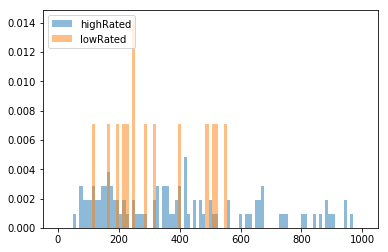

In [59]:
#check for the length of the text
#defining bins 0- start point, until 3000 and 500 evenly spaced numbers
bins = np.linspace(0, 1000, 100)

#If H > L category or vice versa, then Normed will normalize the scale
pyplot.hist(df1[df1["rating"]=='H']["text_length"], bins, alpha = 0.5, normed = True, label ='highRated')
pyplot.hist(df1[df1["rating"]=='L']["text_length"], bins, alpha = 0.5, normed = True, label ='lowRated')
pyplot.legend(loc='upper left')
pyplot.show()


Low-rated reviews have more text length as compared to high rated reviews

C:\Users\Meetu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


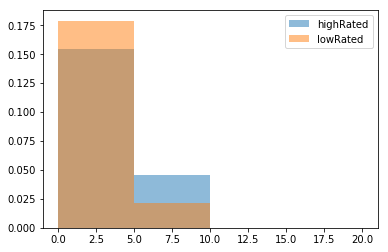

In [58]:
#check for the punctuation in the text
#defining bins 0- start point, until 50 and 40 evenly spaced numbers
bins = np.linspace(0, 20, 5)

#If H > L category or vice versa, then Normed will normalize the scale
pyplot.hist(df1[df1["rating"]=='H']["count_punctuation"], bins, alpha = 0.5, normed = True, label ='highRated')
pyplot.hist(df1[df1["rating"]=='L']["count_punctuation"], bins, alpha = 0.5, normed = True, label ='lowRated')
pyplot.legend(loc='upper right')
pyplot.show()


Punctuation is almost the same in both high-rated and low-rated reviews, so we can ignore this feature.

# creating x_features dataset with all exploratory variables - combination of tfidf dataframe and the extra feature created

In [94]:
#even with axis = 1, got NaNs and extra rows until 175, so before concatenation, reset indices for both dataframes
df1.reset_index(drop=True, inplace=True)
x_tfidf_df.reset_index(drop=True, inplace=True)

#to concatenate these 2 dataframes across columns, you need to specify axis = 1, else you will get NANs values
x_features = pd.concat([df1["text_length"], x_tfidf_df], axis = 1)
print(x_features.tail())
print(x_features.shape)
print(len(df1['rating']))
print(len(df1['text_length']))
print(x_tfidf_df.shape)


     text_length              0  02ghz   06  076   08  08accord  08ilif    1  \
160          845  0.000000  0.0    0.0  0.0  0.0  0.0       0.0     0.0  0.0   
161         1187  0.000000  0.0    0.0  0.0  0.0  0.0       0.0     0.0  0.0   
162         1227  0.000000  0.0    0.0  0.0  0.0  0.0       0.0     0.0  0.0   
163           75  0.000000  0.0    0.0  0.0  0.0  0.0       0.0     0.0  0.0   
164          219  0.210408  0.0    0.0  0.0  0.0  0.0       0.0     0.0  0.0   

     ...   youi  youll     your  youtub  youv  zagg  zero  zip  zippili  zoom  
160  ...    0.0    0.0  0.00000     0.0   0.0   0.0   0.0  0.0      0.0   0.0  
161  ...    0.0    0.0  0.06994     0.0   0.0   0.0   0.0  0.0      0.0   0.0  
162  ...    0.0    0.0  0.00000     0.0   0.0   0.0   0.0  0.0      0.0   0.0  
163  ...    0.0    0.0  0.00000     0.0   0.0   0.0   0.0  0.0      0.0   0.0  
164  ...    0.0    0.0  0.00000     0.0   0.0   0.0   0.0  0.0      0.0   0.0  

[5 rows x 3246 columns]
(165, 3246)
16

# Random Forest Classifier - using cross Validation method

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
# this will list the attributes and methods in this object
print(dir(RandomForestClassifier))

#this will list what hyperparameters are containied and default setting sfor each one of them 
print(RandomForestClassifier())

#fit - to fit ur model and store that fit model as a fit object
#predict - use the fit model object to make predictions on your test set
#feature_importances - outputs value of each feature to the model
#max_depth - how deep each DT is; default is None
#n_estimators - how many DTs are build in the RF; default is 10

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_estimator_type', '_get_param_names', '_make_estimator', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,

In [97]:
#to apply cross validation
#facilitate the splitting the subset and cross val will generate the score
from sklearn.model_selection import KFold, cross_val_score

In [98]:
#initiate RandomForestClassifier; n_jobs = -1 allows to run faster by building DTs in parallel
rf = RandomForestClassifier(n_jobs = -1)

#5 subsets - 1st iteration, model trained on 4 sets, and test on 5th set and likewise in all 5 iterations
k_fold = KFold(n_splits = 5)

#it will generate the score
cross_val_score(rf, x_features, df1["rating"], cv = k_fold, scoring = "accuracy", n_jobs = -1)

#results -
#array([0.84848485, 0.84848485, 0.93939394, 0.78787879, 1.        ])
#shows minimum of 0.84 and maximum of 100% accuracy

array([0.84848485, 0.84848485, 0.93939394, 0.78787879, 1.        ])

# Random Forest Classifier - using hold out method / train-test split method

In [101]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(x_features, df1["rating"], test_size = 0.2)

In [103]:
rf1 = RandomForestClassifier(n_estimators = 50, max_depth = 10, n_jobs = -1)

In [104]:
rf_model = rf1.fit(X_train, y_train)

In [105]:
#This will list the important features, by default its ascending order, so use reverse = True to get the desc order values
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse = True)

[(0.01774707384664324, 'month'),
 (0.016978176371313422, 'help'),
 (0.01447430841916183, 'store'),
 (0.012084046004353796, 'circumst'),
 (0.01205402425915151, 'recharg'),
 (0.011849991110512001, 'ago'),
 (0.011516749500857903, 'everybodi'),
 (0.011161356295198996, 'broke'),
 (0.010254103011544648, 'money'),
 (0.010205228062662356, 'bleed'),
 (0.009967096900270285, 'rate'),
 (0.00985673160249665, 'recommend'),
 (0.009599676822679813, 'learn'),
 (0.0094844826776216, 'mean'),
 (0.00940703770186044, 'back'),
 (0.00936417011711128, 'peopl'),
 (0.009308752347827638, 'sure'),
 (0.00910184065059195, 'sept12'),
 (0.009000785744362477, 'fix'),
 (0.008892561478455116, 'took'),
 (0.008035898872651475, 'pick'),
 (0.007884921251380845, 'antenna'),
 (0.007832848916189347, 'begin'),
 (0.00775944888449907, 'although'),
 (0.0074435824321360386, 'would'),
 (0.007385374062753417, 'seriou'),
 (0.0073030273260190634, 'email'),
 (0.007084489481226827, 'buy'),
 (0.00707443407123253, 'constantli'),
 (0.0068846

In [106]:
y_pred = rf_model.predict(X_test)

In [107]:
precision, recall, fscore, support = score(y_test, y_pred)

C:\Users\Meetu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [108]:
print(precision)
print(recall)
print(fscore)
print(support)

[0.90909091 0.        ]
[1. 0.]
[0.95238095 0.        ]
[30  3]


In [110]:
print("Precision: {} Recall: {} Accuracy:{}".format(precision,3,
                                                 recall, 3,
                                                (y_pred == y_test).sum()/len(y_pred)))

Precision: [0.90909091 0.        ] Recall: 3 Accuracy:[1. 0.]


# Random Forest with Grid serach
defining a grid of hyperparameters setting
It is better because Grid-search will search all parameter combinations in the grid to determine the best model

In [111]:
#build your own grid
# Order is very important - X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(x_features, df1["rating"], test_size = 0.2)

In [115]:
def train_rf(n_est, depth):
    rf1 = RandomForestClassifier(n_estimators = n_est, max_depth= depth, n_jobs = -1)
    rf_model1 = rf.fit(X_train, y_train)
    y_pred = rf_model1.predict(X_test)
    precision, recall, fscore, support = score(y_pred, y_test, pos_label = 'H', average = 'binary')
    print(n_est)
    print(depth)
    print(precision)
    print(recall)
    
    

In [117]:
for n_est in [10, 20, 100]:
        for depth in [10,20,50,None]:
            train_rf(n_est, depth)

10
10
1.0
0.8181818181818182
10
20
1.0
0.8181818181818182
10
50
1.0
0.8181818181818182
10
None
1.0
0.8181818181818182
20
10
1.0
0.8181818181818182
20
20
1.0
0.8181818181818182
20
50
1.0
0.8181818181818182
20
None
1.0
0.8181818181818182
100
10
1.0
0.8181818181818182
100
20
1.0
0.8181818181818182
100
50
1.0
0.8181818181818182
100
None
1.0
0.8181818181818182


In [ ]:
#End of file